In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
# Copy the benchmark tool to the current session
! cp -r '/content/drive/My Drive/code/.' .

In [ ]:
from agent.agent import Agent
from functions import *
import sys

if len(sys.argv) != 4:
	print("Usage: python train.py [stock] [window] [episodes]")
	exit()

stock_name, window_size, episode_count =  'AMZN_Test', 10, 1

agent = Agent(window_size)
data = getStockDataVec(stock_name)
l = len(data) - 1
batch_size = 32
from tqdm import tqdm

for e in tqdm(range(episode_count + 1)):
	print("Episode " + str(e) + "/" + str(episode_count))
	state = getState(data, 0, window_size + 1)

	total_profit = 0
	agent.inventory = []

	for t in range(l):
		action = agent.act(state)

		# sit
		next_state = getState(data, t + 1, window_size + 1)
		reward = 0

		if action == 1: # buy
			agent.inventory.append(data[t])
			print("Buy: " + formatPrice(data[t]))

		elif action == 2 and len(agent.inventory) > 0: # sell
			bought_price = agent.inventory.pop(0)
			reward = max(data[t] - bought_price, 0)
			total_profit += data[t] - bought_price
			print("Sell: " + formatPrice(data[t]) + " | Profit: " + formatPrice(data[t] - bought_price))

		done = True if t == l - 1 else False
		agent.memory.append((state, action, reward, next_state, done))
		state = next_state

		if done:
			print("--------------------------------")
			print("Total Profit: " + formatPrice(total_profit))
			print("--------------------------------")

		if len(agent.memory) > batch_size:
			agent.expReplay(batch_size)

	


  0%|          | 0/2 [00:00<?, ?it/s]

Usage: python train.py [stock] [window] [episodes]
Episode 0/1
Buy: $332.39
Buy: $337.49
Sell: $329.97 | Profit: -$2.42
Sell: $327.92 | Profit: -$9.57
Buy: $346.20
Buy: $355.32
Sell: $355.90 | Profit: $9.70
Buy: $352.45
Sell: $358.66 | Profit: $3.34
Buy: $359.76
Sell: $358.61 | Profit: $6.16
Sell: $324.01 | Profit: -$35.75
Buy: $312.99
Sell: $307.06 | Profit: -$5.93
Buy: $311.45
Buy: $316.80
Buy: $318.33
Buy: $319.32
Sell: $333.21 | Profit: $21.76
Sell: $334.53 | Profit: $17.73
Buy: $331.59
Sell: $341.83 | Profit: $23.50
Buy: $343.18
Buy: $339.04
Sell: $342.38 | Profit: $23.06
Buy: $345.95
Sell: $346.38 | Profit: $14.79
Sell: $342.34 | Profit: -$0.84
Sell: $329.75 | Profit: -$9.29
Sell: $331.33 | Profit: -$14.62
Buy: $325.00
Sell: $331.32 | Profit: $6.32
Buy: $324.50
Buy: $328.21
Buy: $321.93
Buy: $323.21
Buy: $321.82
Buy: $322.44
Sell: $318.41 | Profit: -$6.09
Sell: $322.74 | Profit: -$5.47
Sell: $322.20 | Profit: $0.27
Sell: $316.98 | Profit: -$6.23
Buy: $322.70
Sell: $315.37 | Profi

 50%|█████     | 1/2 [11:58<11:58, 718.06s/it]

Episode 1/1
Buy: $358.14
Buy: $358.61
Buy: $322.51
Sell: $307.06 | Profit: -$51.08
Sell: $313.65 | Profit: -$44.96
Buy: $311.45
Sell: $316.80 | Profit: -$5.71
Sell: $318.33 | Profit: $6.88
Buy: $331.59
Buy: $343.18
Sell: $340.02 | Profit: $8.43
Buy: $339.04
Sell: $342.38 | Profit: -$0.80
Sell: $346.38 | Profit: $7.34
Buy: $342.34
Sell: $329.75 | Profit: -$12.59
Buy: $331.33
Sell: $331.19 | Profit: -$0.14
Buy: $306.45
Sell: $302.86 | Profit: -$3.59
Buy: $303.64
Buy: $306.21
Buy: $312.97
Sell: $313.18 | Profit: $9.54
Buy: $287.06
Buy: $294.12
Sell: $299.07 | Profit: -$7.14
Buy: $305.46
Buy: $302.81
Buy: $296.52
Sell: $312.01 | Profit: -$0.96
Sell: $311.51 | Profit: $24.45
Buy: $316.48
Sell: $324.93 | Profit: $30.81
Sell: $335.64 | Profit: $30.18
Sell: $335.04 | Profit: $32.23
Buy: $333.57
Sell: $338.64 | Profit: $42.12
Sell: $326.00 | Profit: $9.52
Sell: $326.31 | Profit: -$7.26
Buy: $316.93
Buy: $312.63
Sell: $306.64 | Profit: -$10.29
Sell: $312.50 | Profit: -$0.13
Buy: $306.07
Sell: $2

100%|██████████| 2/2 [25:40<00:00, 770.40s/it]


--------------------------------
AMZN_Test Total Profit: $105.69
--------------------------------


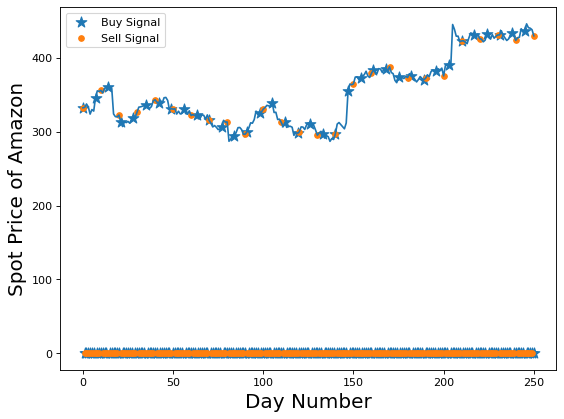

In [ ]:
import keras
from keras.models import load_model

from agent.agent import Agent
from functions import *
import sys

if len(sys.argv) != 3:
    print("Usage: python evaluate.py [stock] [model]")
    exit()

stock_name, model_name = 'AMZN_Test', 'model_ep0'
model = load_model("models/" + model_name)
window_size = model.layers[0].input.shape.as_list()[1]

agent = Agent(window_size, True, model_name)
data = getStockDataVec(stock_name)

l = len(data) - 1
batch_size = 32


total_profit = 0
agent.inventory = []
buy_arr = np.zeros((l,1))
sell_arr = np.zeros((l,1))

state = getState(data, 0, window_size + 1)

for t in range(l):
  action = agent.act(state)
  
  #print(action)
  next_state = getState(data, t + 1, window_size + 1)
  reward = 0
  if action == 1:
    agent.inventory.append(data[t])
    buy_arr[t] = data[t]
    
    print("Buy: " + formatPrice(data[t]))

  elif action == 2 and len(agent.inventory) > 0:
    sell_arr[t] = data[t]
    bought_price = agent.inventory.pop(0)
    reward = max(data[t] - bought_price, 0)
    total_profit += data[t] - bought_price
    print("Sell: " + formatPrice(data[t]) + " | Profit: " + formatPrice(data[t] - bought_price))

  done = True if t == l - 1 else False
  agent.memory.append((state, action, reward, next_state, done))
  state = next_state

  if done:
    print("--------------------------------")
    print(stock_name + " Total Profit: " + formatPrice(total_profit))
    print("--------------------------------")




import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
data = getStockDataVec(stock_name)
arr = range(l)
plt.plot(arr,data[0:l])
plt.scatter(arr,buy_arr,marker='*',s=100,label='Buy Signal')
plt.scatter(arr,sell_arr,marker='.',s=100,label='Sell Signal')
plt.rcParams['figure.figsize'] = [15, 15]
plt.legend()
plt.xlabel('Day Number',fontsize=18)
plt.ylabel('Spot Price of Amazon',fontsize=18)
plt.show()
# plt.savefig('FB.png')
# from google.colab import files
# files.download('FB.png')